In [1]:
import sys
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

# All requested packages already installed.



SE IMPORTA LIBRERIAS QUE SE UTILIZARAN

In [2]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\52811\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\52811\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\52811\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


SE IMPORTA LAS BASES DE DATOS NECESARIAS

In [3]:
import pandas as pd
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/wine-reviews/wine-rev.csv")
d.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


SE IMPORTA LA LIBRERIA PANDAS Y SE INICIALIZA LA VARIABLE "d"

In [4]:
header = ['country', 'description', 'variety']
d.to_csv('solo-rev.csv', columns = header)
e = pd.read_csv('solo-rev.csv')
e.head(4)

,Unnamed: 0,country,description,variety
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Riesling


SE NORMALIZA LOS DATOS Y SE CREA UNA CLASE PARA LA SEPARACIÓN DE INFORMACIÓN DEL CLIENTE

In [6]:
e.drop(e.columns[[0]], axis=1, inplace=True)
e.head(2)

,country,description,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


SE OBTIENEN LOS DATOS UNICOS PARA IDENTIFICAR CUALES SON DE INTERES

In [7]:
e['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [8]:
e.to_csv('s-rev.csv', index=False)
read = pd.read_csv('s-rev.csv')
read.head(2)

,country,description,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


SE ACOMODAN NUEVAMENTE PERO OTRA VES CON LAS FUNCIONES DE PANDAS

In [9]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
pr = pd.read_csv('rev-solo.csv', header = None)
pr.head(3)

,0,1,2
0,Aromas include tropical fruit broom brimstone ...,Italy,White Blend
1,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
2,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris


SE MUESTRA LA TABLA PARA LA VERIFICACIÓN DE LA DISTRIBUCIÓN DE LOS DATOS

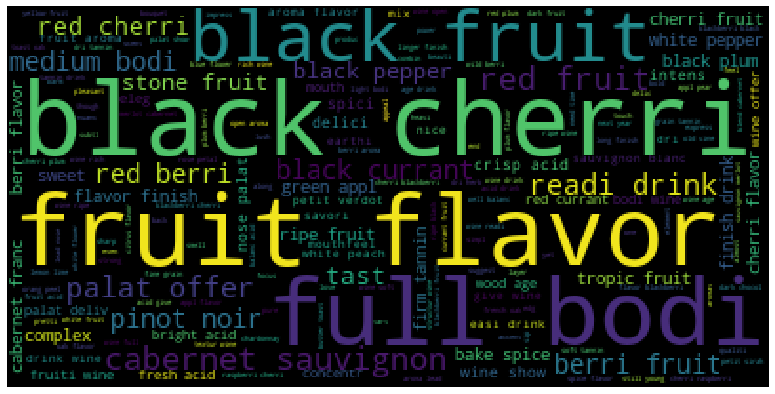

In [10]:
pr.columns = ['description', 'country', 'variety']
n = len(pr)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = pr.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
pr['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

EN EL MAPA DE PALABRAS, ESTAN REPRESENTADAS LAS PALABRAS CON MAYOR FRECUENCIA Y ENTRE MAYOR SEA EL NUMERO DE REPETICIONES EN CADA UNO DE LOS ATRIBUTOS, MAYOR SERA EL TAMAÑO DE LA REPRESENTACION. CON ESTE MAPA NOS PODEMOS DAR CUENTA QUE LAS PALABRAS QUE MAS SE REPTITEN TIENEN RELACION CON LA VARIEDAD DEL VINO. ESTA INFORMACION ESTA FUNDAMENTADA CON LA BASE DE DATOS GLOBAL, ES DECIR QUE LO QUE MUESTRA EL MAPA LOS LOS PUNTOS DE INTERES EN EL TOTAL DE LOS PAISES EN LOS QUE LAS PRUEBAS SE REALIZARON. 

In [11]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'US']
writer.to_csv('us-wine.csv', columns = header, index=False)

lol = pd.read_csv('us-wine.csv')
lol.head(4)

,description,country,variety
0,"Tart and snappy, the flavors of lime flesh and...",US,Pinot Gris
1,"Pineapple rind, lemon pith and orange blossom ...",US,Riesling
2,"Much like the regular bottling from 2012, this...",US,Pinot Noir
3,"Soft, supple plum envelopes an oaky structure ...",US,Cabernet Sauvignon


CREAMOS UNA CLASE PARA COUNTRY ITALIA

In [12]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Italy']
writer.to_csv('italy-wine.csv', columns = header, index=False)

lol = pd.read_csv('italy-wine.csv')
lol.head(4)

,description,country,variety
0,"Aromas include tropical fruit, broom, brimston...",Italy,White Blend
1,"Here's a bright, informal red that opens with ...",Italy,Frappato
2,This is dominated by oak and oak-driven aromas...,Italy,Nerello Mascalese
3,Delicate aromas recall white flower and citrus...,Italy,White Blend


CREAMOS OTRA CLASE PARA PORTUGAL

In [13]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Portugal']
writer.to_csv('portugal-wine.csv', columns = header, index=False)

lol = pd.read_csv('portugal-wine.csv')
lol.head(4)

,description,country,variety
0,"This is ripe and fruity, a wine that is smooth...",Portugal,Portuguese Red
1,"Grown on the sandy soil of Tejo, the wine is t...",Portugal,Touriga Nacional
2,"This bottling shows a rich, wood-aged wine, fu...",Portugal,Portuguese White
3,"From an estate in the south of the Alentejo, t...",Portugal,Portuguese Red


EL SIGUIENTE EJERCICIO ES REDUCIR NUESTRO ESPACIO MUESTRAL PARA OBTENER CIERTA INFORMACIÓN

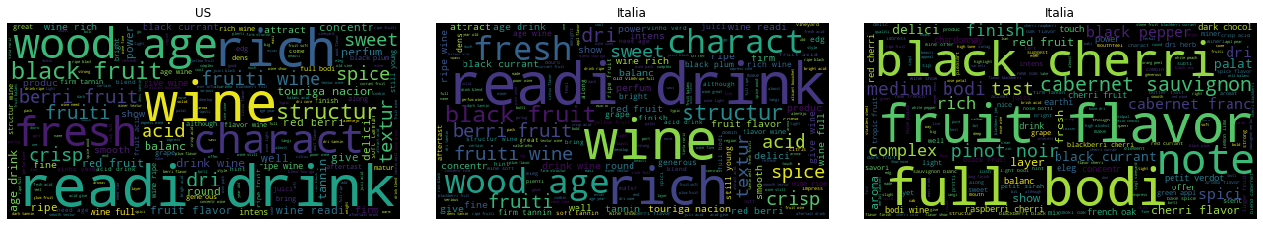

In [14]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("portugal-wine.csv", header = None)
dmcu = pd.read_csv("us-wine.csv", header = None)
dord = pd.read_csv("italy-wine.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Portugal", "US", "Italia"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

SE OBTIENEN TRES MAPAS DIFERENTES DONDE SE PUEDE VISUALIZAR LAS DIFERENCIAS ENTRE ELLOS